In [2]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import statistics
import math

#for LSTM model
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout
import tensorflow as tf

# ignore warnings
import warnings
warnings.filterwarnings("ignore")

In [3]:
data = pd.read_csv("Historical Product Demand.csv")
data

,Product_Code,Warehouse,Product_Category,Date,Order_Demand
0,Product_0993,Whse_J,Category_028,2012/7/27,100
1,Product_0979,Whse_J,Category_028,2012/1/19,500
2,Product_0979,Whse_J,Category_028,2012/2/3,500
3,Product_0979,Whse_J,Category_028,2012/2/9,500
4,Product_0979,Whse_J,Category_028,2012/3/2,500
...,...,...,...,...,...
1048570,Product_1791,Whse_J,Category_006,2016/4/27,1000
1048571,Product_1974,Whse_J,Category_006,2016/4/27,1
1048572,Product_1787,Whse_J,Category_006,2016/4/28,2500
1048573,Product_0901,Whse_J,Category_023,2016/10/7,50


In [4]:
data.rename(columns = {'Product_Code': 'ProductCode',
                       'Product_Category': 'ProductCategory', 
                       'Order_Demand': 'OrderDemand'}, inplace = True)
data.head()

,ProductCode,Warehouse,ProductCategory,Date,OrderDemand
0,Product_0993,Whse_J,Category_028,2012/7/27,100
1,Product_0979,Whse_J,Category_028,2012/1/19,500
2,Product_0979,Whse_J,Category_028,2012/2/3,500
3,Product_0979,Whse_J,Category_028,2012/2/9,500
4,Product_0979,Whse_J,Category_028,2012/3/2,500


In [5]:
data.isnull().sum()

ProductCode            0
Warehouse              0
ProductCategory        0
Date               11239
OrderDemand            0
dtype: int64

In [6]:
# drop the missing values, we can not fill the date so best way drop missing samples
data.dropna(inplace=True)

# check the null data again
data.isnull().sum()

ProductCode        0
Warehouse          0
ProductCategory    0
Date               0
OrderDemand        0
dtype: int64

In [7]:
# sort the data according yo date column
data.sort_values('Date', ignore_index=True, inplace=True)
data.head()

,ProductCode,Warehouse,ProductCategory,Date,OrderDemand
0,Product_0965,Whse_A,Category_006,2011/1/8,2
1,Product_0412,Whse_S,Category_007,2011/10/20,(2)
2,Product_0125,Whse_S,Category_011,2011/10/20,(2)
3,Product_0642,Whse_C,Category_019,2011/10/31,3
4,Product_2137,Whse_S,Category_009,2011/11/18,(25)


In [8]:
# there are () int the OrderDemand column and we need to remove them
data['OrderDemand'] = data['OrderDemand'].str.replace('(',"")
data['OrderDemand'] = data['OrderDemand'].str.replace(')',"")

# change the dtype as int64
data['OrderDemand'] = data['OrderDemand'].astype('int64')

In [9]:
# creating Year, Month, Day field for further analysis

# first way
# data[["Year", "Month", "Day"]] = data["Date"].str.split("/", expand = True)
# data

# second way change date columns dtype as datetime 
from datetime import datetime as dt

# convert the 'Date' column to datetime format
data['Date']= pd.to_datetime(data['Date'])

# create Year, Month, Day columns
data['Year'] = data["Date"].dt.year
data['Month'] = data["Date"].dt.month
data['Day'] = data["Date"].dt.day
# i used second way because i think it is more usable for dtypes

In [10]:
# information about data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1037336 entries, 0 to 1037335
Data columns (total 8 columns):
 #   Column           Non-Null Count    Dtype         
---  ------           --------------    -----         
 0   ProductCode      1037336 non-null  object        
 1   Warehouse        1037336 non-null  object        
 2   ProductCategory  1037336 non-null  object        
 3   Date             1037336 non-null  datetime64[ns]
 4   OrderDemand      1037336 non-null  int64         
 5   Year             1037336 non-null  int64         
 6   Month            1037336 non-null  int64         
 7   Day              1037336 non-null  int64         
dtypes: datetime64[ns](1), int64(4), object(3)
memory usage: 63.3+ MB


In [11]:
# statistical information about OrderDemand
data["OrderDemand"].describe()

count    1.037336e+06
mean     4.949384e+03
std      2.907344e+04
min      0.000000e+00
25%      2.000000e+01
50%      3.000000e+02
75%      2.000000e+03
max      4.000000e+06
Name: OrderDemand, dtype: float64

In [12]:
# information about categorical variables
data[["ProductCode", "Warehouse", "ProductCategory"]].describe()

,ProductCode,Warehouse,ProductCategory
count,1037336,1037336,1037336
unique,2160,4,33
top,Product_1359,Whse_J,Category_019
freq,16936,764447,470266


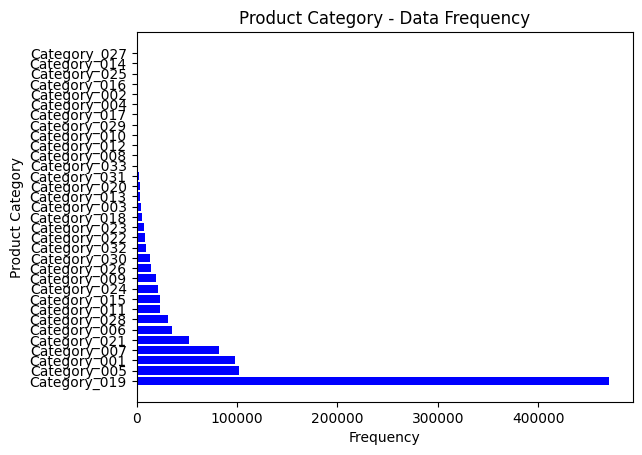

Number of ProductCategory 
Category_019    470266
Category_005    101627
Category_001     97787
Category_007     82402
Category_021     52008
Category_006     35552
Category_028     31012
Category_011     23208
Category_015     22954
Category_024     20885
Category_009     19738
Category_026     14771
Category_030     12997
Category_032      9296
Category_022      8657
Category_023      7899
Category_018      5239
Category_003      4189
Category_013      3743
Category_020      3490
Category_031      2268
Category_033      1849
Category_008      1560
Category_012      1147
Category_010       976
Category_029       671
Category_017       615
Category_004       329
Category_002        77
Category_016        37
Category_025        35
Category_014        26
Category_027        26
Name: ProductCategory, dtype: int64


In [13]:
# Number of samples according to ProductCategory
plt.figure()
plt.barh(data["ProductCategory"].value_counts().index, data["ProductCategory"].value_counts(), color = "b")
plt.xlabel("Frequency")
plt.ylabel("Product Category")
plt.title("Product Category - Data Frequency")
plt.show()
print(f"Number of ProductCategory \n{data['ProductCategory'].value_counts()}")

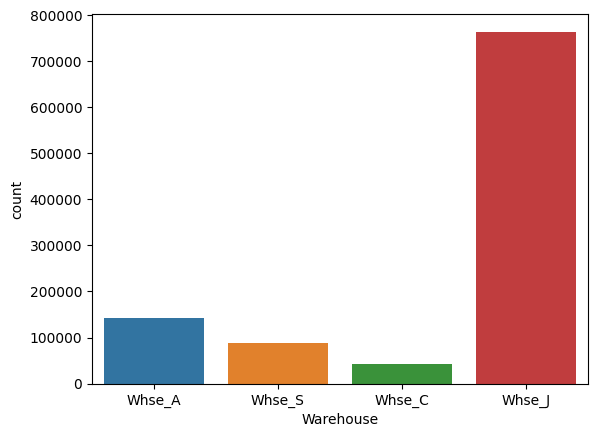

Number of samples according to Warehouse 
Whse_J    764447
Whse_A    142335
Whse_S     88200
Whse_C     42354
Name: Warehouse, dtype: int64


In [14]:
# Number of samples according to Warehouse
sns.countplot(x="Warehouse", data=data)
plt.xticks(rotation = 0)
plt.show()
print(f"Number of samples according to Warehouse \n{data['Warehouse'].value_counts()}")

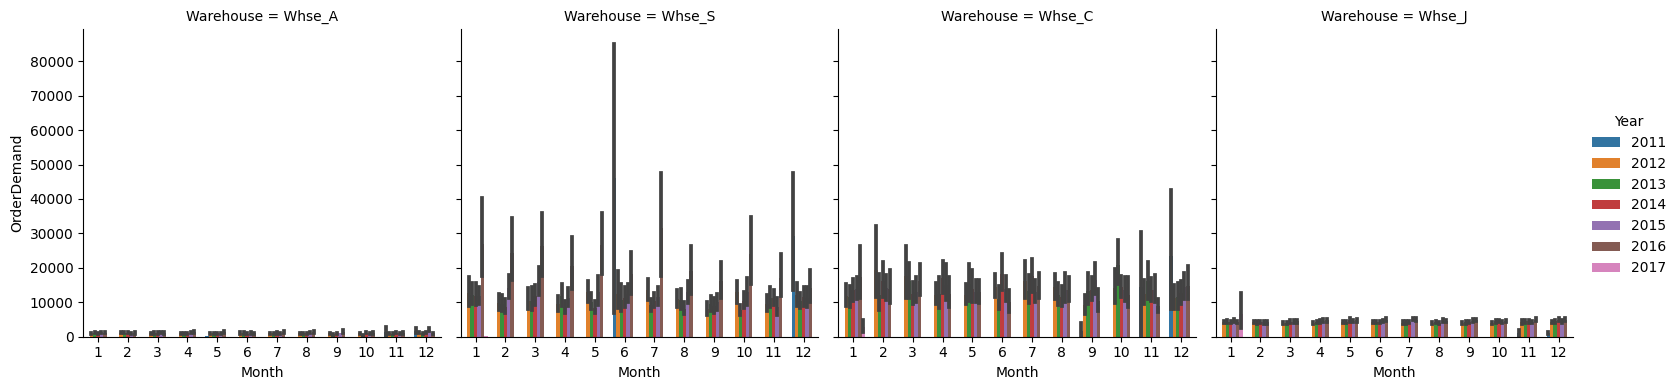

In [15]:
sns.catplot(x="Month", y="OrderDemand",  hue="Year", col="Warehouse",
            data=data, kind="bar", height=4)
plt.show()

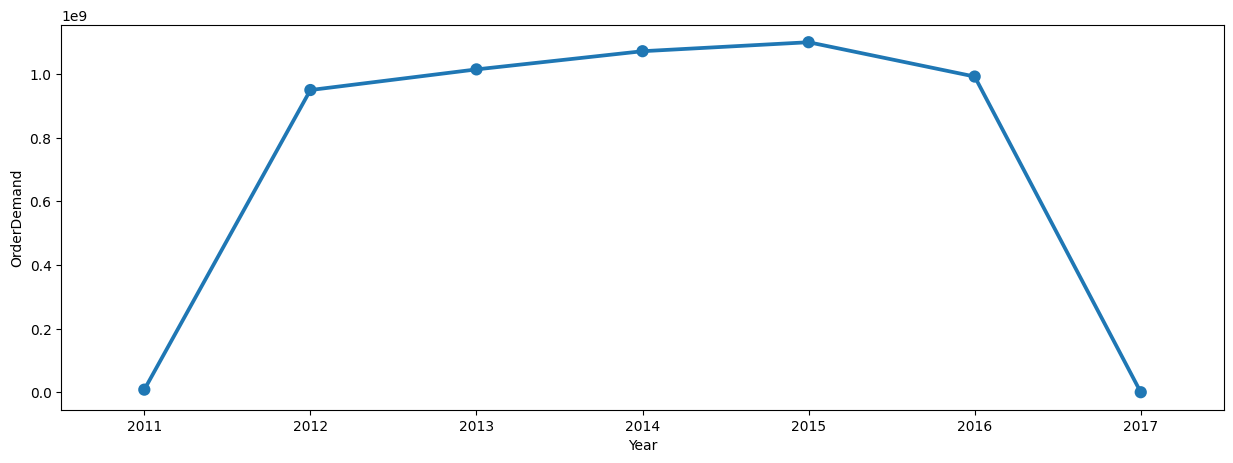

In [16]:
df = data[['OrderDemand', 'Year']].groupby(["Year"]).sum().reset_index().sort_values(by='Year', ascending=False)
f, ax=plt.subplots(figsize=(15, 5))
sns.pointplot(x='Year', y='OrderDemand', data=df)
plt.show()

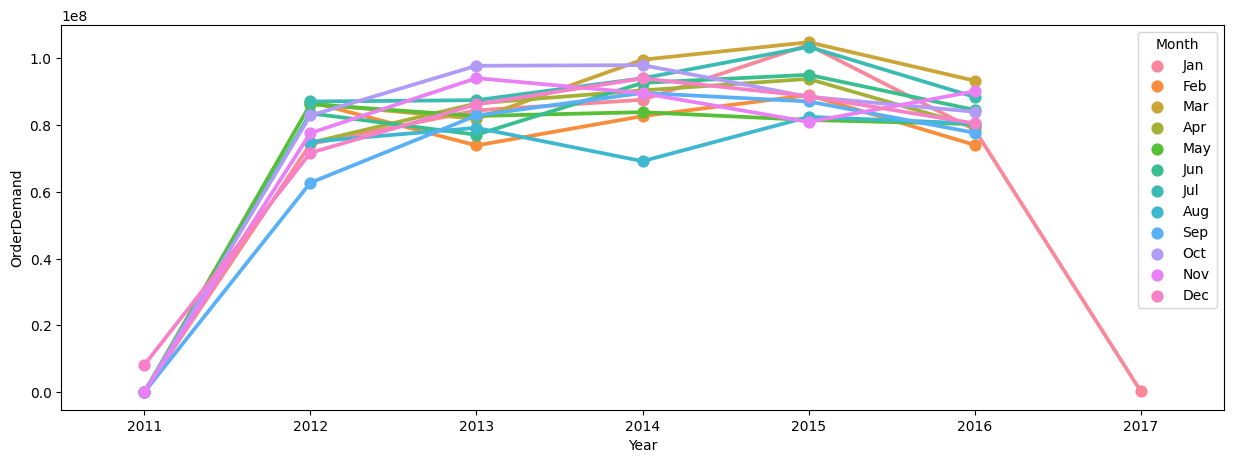

In [17]:
temp_data = data.copy()
temp_data.Month.replace([1,2,3,4,5,6,7,8,9,10,11,12], ['Jan', 'Feb', 'Mar', 'Apr', 'May',
                                                       'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], inplace=True)
df = temp_data[['OrderDemand',
                'Month', 'Year',]].groupby(["Year",
                                            "Month"]).sum().reset_index().sort_values(by=['Year',
                                                                                          'Month'], ascending=False)
f, ax=plt.subplots(figsize=(15, 5))
sns.pointplot(x='Year', y='OrderDemand', data=df, hue='Month', hue_order=['Jan', 'Feb', 'Mar', 'Apr', 'May',
                                                                          'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.show()

In [18]:
# Monthly pivot table
df = (df.pivot(index='Year', columns='Month', values='OrderDemand'))
df = df.loc[:, ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']]
df

Month,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
Year,,,,,,,,,,,,
2011,2.0,NaN,NaN,NaN,108.0,92000.0,NaN,NaN,6728.0,7.0,86524.0,8178525.0
2012,74331037.0,86951780.0,86463212.0,74714053.0,86246051.0,83521679.0,87071567.0,75003241.0,62748329.0,82891675.0,77618687.0,71698680.0
2013,84399001.0,73899741.0,81857480.0,86489453.0,82735797.0,77115902.0,87469057.0,79181220.0,82882856.0,97773582.0,94072859.0,86210974.0
2014,87593983.0,82688430.0,99580627.0,90391888.0,83876775.0,92655892.0,94023350.0,69199733.0,89629088.0,97963491.0,89572680.0,94002430.0
2015,104028474.0,88991822.0,104825197.0,93842250.0,81540033.0,95074257.0,103449803.0,82468895.0,87080162.0,88477211.0,80944042.0,88676245.0
2016,78627619.0,74065041.0,93303910.0,79503364.0,80299593.0,84553011.0,88439936.0,80471772.0,77698896.0,84000757.0,90128568.0,80497932.0
2017,294967.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


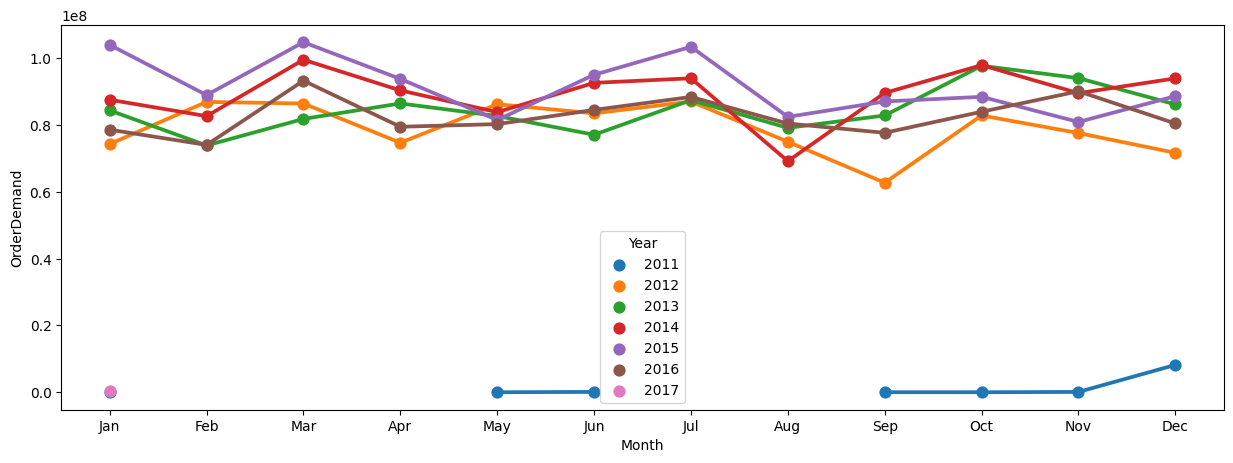

In [19]:
custom_dict = {'Jan':0, 'Feb':1, 'Mar':2, 'Apr':3, 'May':4, 'Jun':5,
               'Jul':6, 'Aug':7, 'Sep':8, 'Oct':9, 'Nov':10, 'Dec':11}
temp_data = data.copy()
temp_data.Month.replace([1,2,3,4,5,6,7,8,9,10,11,12], ['Jan', 'Feb', 'Mar', 'Apr', 'May', 
                                                               'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], inplace=True)
df = temp_data[["OrderDemand", 'Month', 'Year']].groupby(["Year",
                                                  "Month"]).sum().reset_index().sort_values(by=['Year', 
                                                                                                 'Month'], ascending=True)
df = df.iloc[df['Month'].map(custom_dict).argsort()]
f, ax=plt.subplots(figsize=(15, 5))
sns.pointplot(x='Month', y="OrderDemand", data=df, hue="Year")
plt.show()

In [20]:
df.describe()

,Year,OrderDemand
count,68.000000,6.800000e+01
mean,2013.735294,7.550256e+07
std,1.671693,2.852781e+07
min,2011.000000,2.000000e+00
25%,2012.000000,7.749299e+07
50%,2014.000000,8.369923e+07
75%,2015.000000,8.913704e+07
max,2017.000000,1.048252e+08


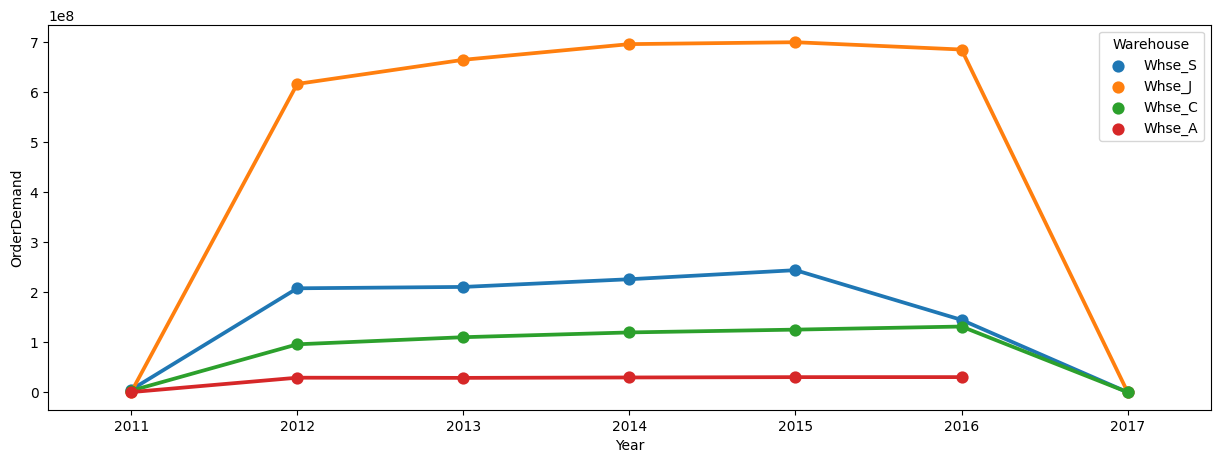

In [21]:
df = data[["OrderDemand", 'Year', 'Warehouse']].groupby(["Year",
                                                         "Warehouse"]).sum().reset_index().sort_values(by=['Warehouse','Year'], ascending=False)
f, ax=plt.subplots(figsize=(15, 5))
sns.pointplot(x='Year', y="OrderDemand", data=df, hue="Warehouse")
plt.show()

In [22]:
df = (df.pivot(index='Year', columns='Warehouse', values='OrderDemand'))
df

Warehouse,Whse_A,Whse_C,Whse_J,Whse_S
Year,,,,
2011,230881.0,3031847.0,198547.0,4902619.0
2012,29048000.0,95823181.0,616560449.0,207828361.0
2013,28696890.0,110035879.0,664781670.0,210573483.0
2014,29507380.0,119583036.0,696130811.0,225957140.0
2015,30167990.0,125188986.0,699932604.0,244108811.0
2016,30226290.0,131373097.0,685336996.0,144654016.0
2017,NaN,35378.0,259319.0,270.0


In [23]:
# Statistical information about according to warehouse data
df.describe()

Warehouse,Whse_A,Whse_C,Whse_J,Whse_S
count,6.000000e+00,7.000000e+00,7.000000e+00,7.000000e+00
mean,2.464624e+07,8.358163e+07,4.804572e+08,1.482892e+08
std,1.197623e+07,5.719735e+07,3.292411e+08,1.042437e+08
min,2.308810e+05,3.537800e+04,1.985470e+05,2.700000e+02
25%,2.878467e+07,4.942751e+07,3.084099e+08,7.477832e+07
50%,2.927769e+07,1.100359e+08,6.647817e+08,2.078284e+08
75%,3.000284e+07,1.223860e+08,6.907339e+08,2.182653e+08
max,3.022629e+07,1.313731e+08,6.999326e+08,2.441088e+08


In [24]:
df = data[["OrderDemand",
           'ProductCategory', 'Warehouse']].groupby(["ProductCategory",
                                                     "Warehouse"]).sum().reset_index().sort_values(by=['OrderDemand'],
                                                                                                   ascending=False)
df = df.pivot(index='ProductCategory', columns='Warehouse', values='OrderDemand')
df

Warehouse,Whse_A,Whse_C,Whse_J,Whse_S
ProductCategory,,,,
Category_001,1749.0,60106.0,1.623054e+06,72564.0
Category_002,NaN,NaN,NaN,628.0
Category_003,131607.0,NaN,3.926700e+04,222076.0
Category_004,NaN,NaN,NaN,99046.0
Category_005,1124300.0,12528700.0,1.289245e+08,57097050.0
Category_006,11613427.0,33131500.0,3.187667e+08,42059693.0
Category_007,2839680.0,7179524.0,1.121572e+08,6515085.0
Category_008,1903.0,317.0,1.534800e+04,NaN
Category_009,920903.0,251031.0,4.464690e+05,2163738.0


In [25]:
# for better results use the data between 2012-01-01 and 2016-12-31
df = data[(data['Date']>='2012-01-01') & (data['Date']<='2016-12-31')].sort_values('Date', ascending=True)
df = df.groupby('Date')['OrderDemand'].sum().reset_index()
df

,Date,OrderDemand
0,2012-01-01,2
1,2012-01-02,680277
2,2012-01-03,1645257
3,2012-01-04,1295861
4,2012-01-05,8941774
...,...,...
1676,2016-12-26,3628370
1677,2016-12-27,1674226
1678,2016-12-28,2740302
1679,2016-12-29,530487


In [26]:
#y = df.OrderDemand.resample('MS').mean()
# df['Date'] = pd.to_datetime(df['Date'])
df = df.set_index('Date') 
df.index

# y = df.OrderDemand.resample('MS').mean()
#y = df['OrderDemand'].resample('MS').mean()


DatetimeIndex(['2012-01-01', '2012-01-02', '2012-01-03', '2012-01-04',
               '2012-01-05', '2012-01-06', '2012-01-08', '2012-01-09',
               '2012-01-10', '2012-01-11',
               ...
               '2016-12-20', '2016-12-21', '2016-12-22', '2016-12-23',
               '2016-12-25', '2016-12-26', '2016-12-27', '2016-12-28',
               '2016-12-29', '2016-12-30'],
              dtype='datetime64[ns]', name='Date', length=1681, freq=None)

In [27]:
y = df['OrderDemand'].resample('MS').mean()
#y = df.groupby(pd.PeriodIndex(df.index, freq="M"))['OrderDemand'].mean()
#y['OrderDemand'] = df.groupby(pd.PeriodIndex(df.index, freq="M"))['OrderDemand'].mean()
y

Date
2012-01-01    2.563139e+06
2012-02-01    3.105421e+06
2012-03-01    3.087972e+06
2012-04-01    2.668359e+06
2012-05-01    2.974002e+06
2012-06-01    2.982917e+06
2012-07-01    3.109699e+06
2012-08-01    2.586319e+06
2012-09-01    2.509933e+06
2012-10-01    2.960417e+06
2012-11-01    2.587290e+06
2012-12-01    2.560667e+06
2013-01-01    2.813300e+06
2013-02-01    2.737027e+06
2013-03-01    2.822672e+06
2013-04-01    3.088909e+06
2013-05-01    2.852959e+06
2013-06-01    2.856145e+06
2013-07-01    3.016174e+06
2013-08-01    2.730387e+06
2013-09-01    2.960102e+06
2013-10-01    3.153987e+06
2013-11-01    3.359745e+06
2013-12-01    2.873699e+06
2014-01-01    2.919799e+06
2014-02-01    2.953158e+06
2014-03-01    3.319354e+06
2014-04-01    3.116962e+06
2014-05-01    2.892303e+06
2014-06-01    3.088530e+06
2014-07-01    3.482346e+06
2014-08-01    2.306658e+06
2014-09-01    3.319596e+06
2014-10-01    3.265450e+06
2014-11-01    3.199024e+06
2014-12-01    3.032336e+06
2015-01-01    3.715303e

In [28]:
df2 = pd.DataFrame(y, columns=['OrderDemand'])
df3 = pd.DataFrame(y, columns=['OrderDemand'])
df2 = df2.reset_index()
df2


,Date,OrderDemand
0,2012-01-01,2.563139e+06
1,2012-02-01,3.105421e+06
2,2012-03-01,3.087972e+06
3,2012-04-01,2.668359e+06
4,2012-05-01,2.974002e+06
5,2012-06-01,2.982917e+06
6,2012-07-01,3.109699e+06
7,2012-08-01,2.586319e+06
8,2012-09-01,2.509933e+06
9,2012-10-01,2.960417e+06


In [30]:
df_diff = df2.copy()
#add previous sales to the next row
df_diff['prev_demand'] = df_diff['OrderDemand'].shift(1)
#drop the null values and calculate the difference
df_diff = df_diff.dropna()
df_diff['diff'] = (df_diff['OrderDemand'] - df_diff['prev_demand'])
df_diff.head(10)

,Date,OrderDemand,prev_demand,diff
1,2012-02-01,3.105421e+06,2.563139e+06,542281.507389
2,2012-03-01,3.087972e+06,3.105421e+06,-17448.857143
3,2012-04-01,2.668359e+06,3.087972e+06,-419612.821429
4,2012-05-01,2.974002e+06,2.668359e+06,305642.722906
5,2012-06-01,2.982917e+06,2.974002e+06,8915.348522
6,2012-07-01,3.109699e+06,2.982917e+06,126781.714286
7,2012-08-01,2.586319e+06,3.109699e+06,-523380.166256
8,2012-09-01,2.509933e+06,2.586319e+06,-76385.495172
9,2012-10-01,2.960417e+06,2.509933e+06,450483.804286
10,2012-11-01,2.587290e+06,2.960417e+06,-373127.397619


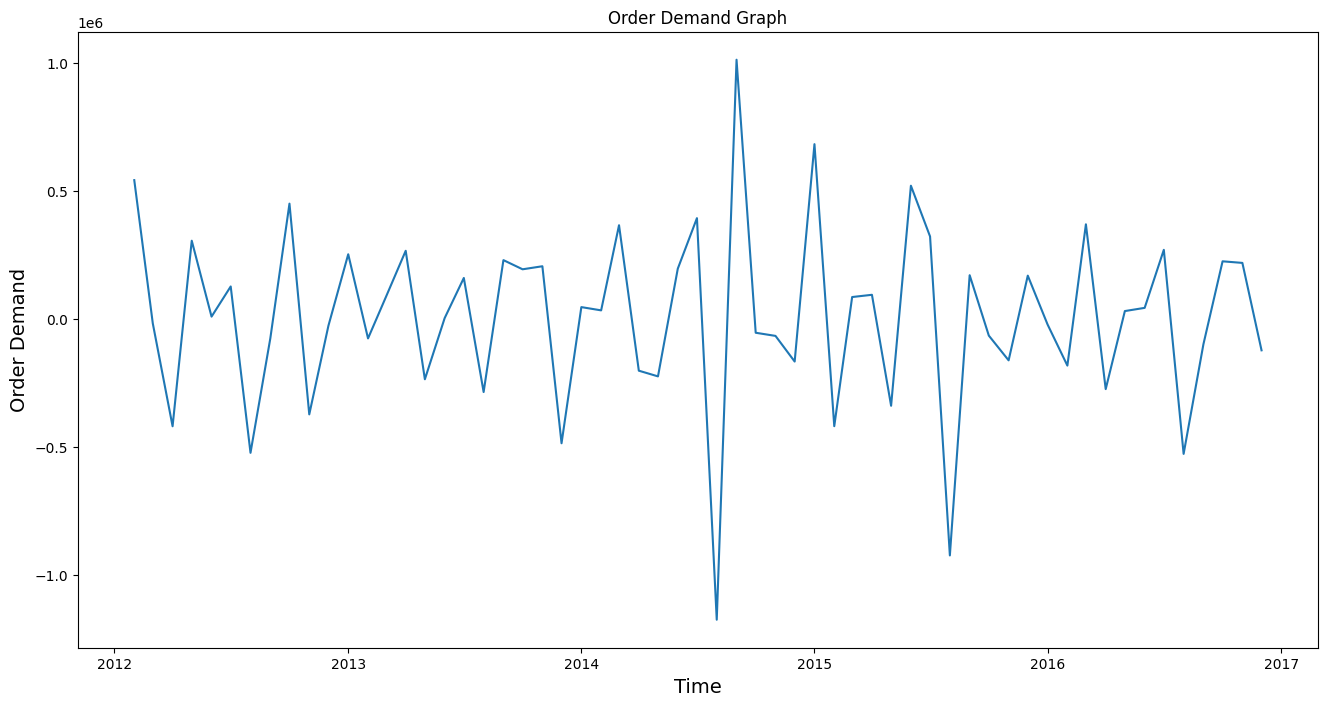

In [31]:
plt.figure(figsize=(16, 8))
plt.title("Order Demand Graph")
plt.plot(df_diff["Date"], df_diff["diff"])
plt.xlabel("Time", fontsize=14,)
plt.ylabel("Order Demand", fontsize=14)
plt.show()

In [40]:
#create dataframe for transformation from time series to supervised
df_supervised = df_diff.drop(['prev_demand'],axis=1)
#adding lags
for inc in range(1,13):
    field_name = 'lag_' + str(inc)
    df_supervised[field_name] = df_supervised['diff'].shift(inc)
#drop null values
df_supervised = df_supervised.dropna().reset_index(drop=True)
df_supervised.head()

,Date,OrderDemand,diff,lag_1,lag_2,lag_3,lag_4,lag_5,lag_6,lag_7,lag_8,lag_9,lag_10,lag_11,lag_12
0,2013-02-01,2.737027e+06,-76272.588889,252632.890476,-26622.423810,-373127.397619,450483.804286,-76385.495172,-523380.166256,126781.714286,8915.348522,305642.722906,-419612.821429,-17448.857143,542281.507389
1,2013-03-01,2.822672e+06,85644.279693,-76272.588889,252632.890476,-26622.423810,-373127.397619,450483.804286,-76385.495172,-523380.166256,126781.714286,8915.348522,305642.722906,-419612.821429,-17448.857143
2,2013-04-01,3.088909e+06,266237.311576,85644.279693,-76272.588889,252632.890476,-26622.423810,-373127.397619,450483.804286,-76385.495172,-523380.166256,126781.714286,8915.348522,305642.722906,-419612.821429
3,2013-05-01,2.852959e+06,-235950.518473,266237.311576,85644.279693,-76272.588889,252632.890476,-26622.423810,-373127.397619,450483.804286,-76385.495172,-523380.166256,126781.714286,8915.348522,305642.722906
4,2013-06-01,2.856145e+06,3186.001277,-235950.518473,266237.311576,85644.279693,-76272.588889,252632.890476,-26622.423810,-373127.397619,450483.804286,-76385.495172,-523380.166256,126781.714286,8915.348522


In [43]:
# Import statsmodels.formula.api
import statsmodels.formula.api as smf
# Define the regression formula
model = smf.ols(formula='diff ~ lag_1 + lag_2 + lag_3 + lag_4 + lag_5 + lag_6 + lag_7 + lag_8 + lag_9 + lag_10 + lag_11 + lag_12', data=df_supervised)
# Fit the regression
model_fit = model.fit()
# Extract the adjusted r-squared
regression_adj_rsq = model_fit.rsquared_adj
print(regression_adj_rsq)

0.42813646725317855


In [91]:
#import MinMaxScaler and create a new dataframe for LSTM model
from sklearn.preprocessing import MinMaxScaler
df_model = df_supervised.drop(['OrderDemand','Date'],axis=1)
#split train and test set
train_set, test_set = df_model[0:-6].values, df_model[-12:].values
test_set

array([[ -21903.99      ,  169081.26851852, -161972.91137566,
         -65290.79232804,  170787.66666667, -924435.05840456,
         322136.38461538,  520547.07692308, -339483.77350427,
          94180.92114695,   85464.56033453, -419309.23544974,
         682966.19124424],
       [-182503.12      ,  -21903.99      ,  169081.26851852,
        -161972.91137566,  -65290.79232804,  170787.66666667,
        -924435.05840456,  322136.38461538,  520547.07692308,
        -339483.77350427,   94180.92114695,   85464.56033453,
        -419309.23544974],
       [ 369680.86      , -182503.12      ,  -21903.99      ,
         169081.26851852, -161972.91137566,  -65290.79232804,
         170787.66666667, -924435.05840456,  322136.38461538,
         520547.07692308, -339483.77350427,   94180.92114695,
          85464.56033453],
       [-274460.80769231,  369680.86      , -182503.12      ,
         -21903.99      ,  169081.26851852, -161972.91137566,
         -65290.79232804,  170787.66666667, -924435

In [92]:
#apply Min Max Scaler
scaler = MinMaxScaler(feature_range=(-1, 1))
scaler = scaler.fit(train_set)
# reshape training set
train_set = train_set.reshape(train_set.shape[0], train_set.shape[1])
train_set_scaled = scaler.transform(train_set)
# reshape test set
test_set = test_set.reshape(test_set.shape[0], test_set.shape[1])
test_set_scaled = scaler.transform(test_set)

In [93]:
X_train, y_train = train_set_scaled[:, 1:], train_set_scaled[:, 0:1]
X_train = X_train.reshape(X_train.shape[0], 1, X_train.shape[1])
X_test, y_test = test_set_scaled[:, 1:], test_set_scaled[:, 0:1]
X_test = X_test.reshape(X_test.shape[0], 1, X_test.shape[1])

In [94]:
model = Sequential()
model.add(LSTM(4, batch_input_shape=(1, X_train.shape[1], X_train.shape[2]), stateful=True))
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam', metrics = ['mape'])
model.fit(X_train, y_train, epochs=100, batch_size=1, verbose=1, shuffle=False)

Epoch 1/100
41/41 [==============================] - 2s 2ms/step - loss: 0.1230 - mape: 25.6986
Epoch 2/100
41/41 [==============================] - 0s 2ms/step - loss: 0.1168 - mape: 24.4486
Epoch 3/100
41/41 [==============================] - 0s 2ms/step - loss: 0.1130 - mape: 23.6041
Epoch 4/100
41/41 [==============================] - 0s 2ms/step - loss: 0.1100 - mape: 23.0402
Epoch 5/100
41/41 [==============================] - 0s 2ms/step - loss: 0.1075 - mape: 22.6928
Epoch 6/100
41/41 [==============================] - 0s 2ms/step - loss: 0.1051 - mape: 22.4011
Epoch 7/100
41/41 [==============================] - 0s 2ms/step - loss: 0.1028 - mape: 22.2016
Epoch 8/100
41/41 [==============================] - 0s 2ms/step - loss: 0.1005 - mape: 21.9972
Epoch 9/100
41/41 [==============================] - 0s 2ms/step - loss: 0.0982 - mape: 21.7830
Epoch 10/100
41/41 [==============================] - 0s 1ms/step - loss: 0.0958 - mape: 21.5565
Epoch 11/100
41/41 [===================

In [95]:
y_pred = model.predict(X_test,batch_size=1)
#for multistep prediction, you need to replace X_test values with the predictions coming from t-1

12/12 [==============================] - 2s 1ms/step


In [96]:

#reshape y_pred
y_pred = y_pred.reshape(y_pred.shape[0], 1, y_pred.shape[1])
#rebuild test set for inverse transform
pred_test_set = []
for index in range(0,len(y_pred)):
    np.concatenate([y_pred[index],X_test[index]],axis=1)
    pred_test_set.append(np.concatenate([y_pred[index],X_test[index]],axis=1))
#reshape pred_test_set
pred_test_set = np.array(pred_test_set)
pred_test_set = pred_test_set.reshape(pred_test_set.shape[0], pred_test_set.shape[2])
#inverse transform
pred_test_set_inverted = scaler.inverse_transform(pred_test_set)

In [97]:
#create dataframe that shows the predicted sales
result_list = []
sales_dates = list(df2[-13:].Date)
act_sales = list(df2[-13:].OrderDemand)
for index in range(0,len(pred_test_set_inverted)):
    result_dict = {}
    result_dict['pred_value'] = int(pred_test_set_inverted[index][0] + act_sales[index])
    result_dict['Date'] = sales_dates[index+1]
    result_list.append(result_dict)
df_result = pd.DataFrame(result_list)
#for multistep prediction, replace act_sales with the predicted sales

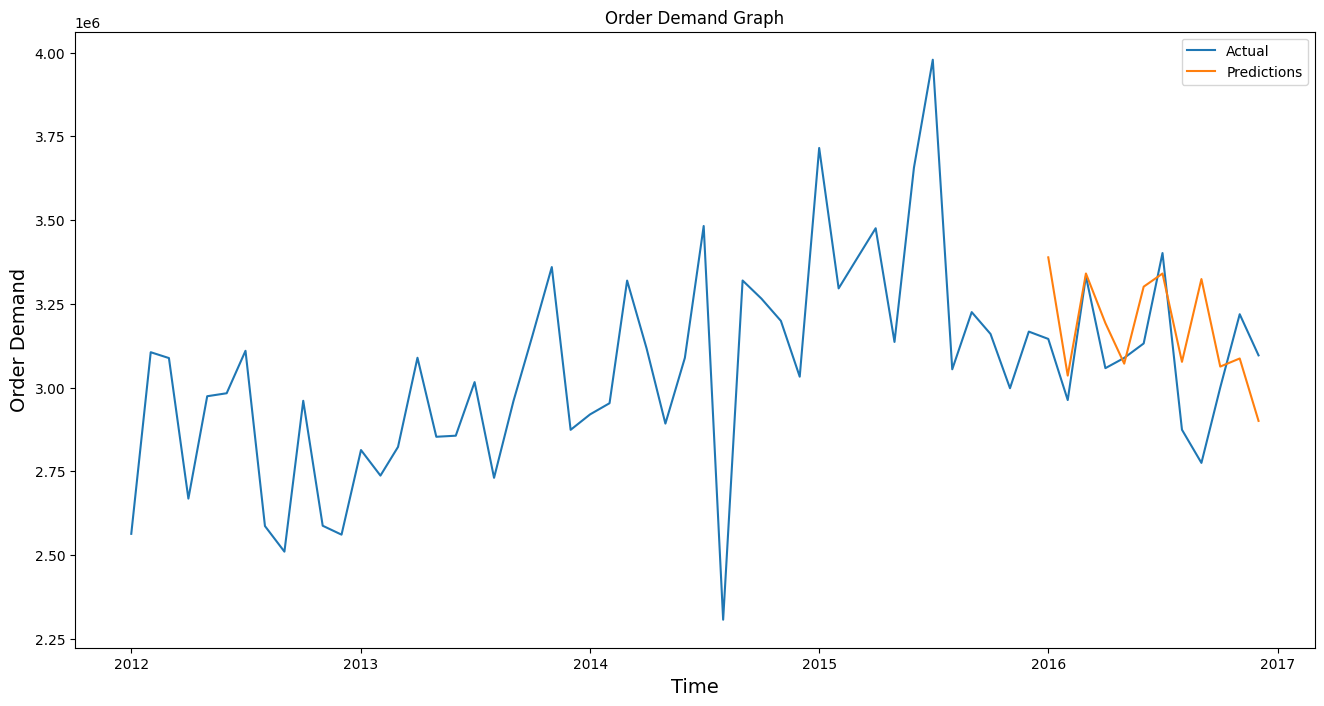

In [98]:
#merge with actual sales dataframe
df2_pred = pd.merge(df2,df_result,on='Date',how='left')

plt.figure(figsize=(16, 8))
plt.title("Order Demand Graph")
plt.plot(df2_pred["Date"], df2_pred["OrderDemand"])
plt.plot(df2_pred["Date"], df2_pred["pred_value"])
plt.xlabel("Time", fontsize=14,)
plt.ylabel("Order Demand", fontsize=14)
plt.legend(["Actual", "Predictions"], loc="upper right")
plt.show()

In [58]:
df_result

,pred_value,Date
0,3106028,2016-07-01
1,2995065,2016-08-01
2,3127888,2016-09-01
3,2937092,2016-10-01
4,3153486,2016-11-01
5,2844462,2016-12-01


In [279]:
# Create new data with only the "OrderDemand" column
orderD = df.filter(["OrderDemand"])
# Convert the dataframe to a np array
orderD_array = df3.values
# See the train data len
train_close_len = math.ceil(len(orderD_array) * 0.8)
train_close_len

48

In [257]:
orderD

,OrderDemand
Date,
2012-01-01,2
2012-01-02,680277
2012-01-03,1645257
2012-01-04,1295861
2012-01-05,8941774
...,...
2016-12-26,3628370
2016-12-27,1674226
2016-12-28,2740302


In [258]:
# Normalize the data
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(orderD_array.reshape(-1,1))
scaled_data

array([[0.1533814 ],
       [0.47767738],
       [0.46724259],
       [0.21630512],
       [0.39908602],
       [0.40441759],
       [0.48023578],
       [0.16724321],
       [0.12156305],
       [0.39096203],
       [0.16782384],
       [0.15190306],
       [0.30298295],
       [0.2573703 ],
       [0.30858742],
       [0.46780304],
       [0.32669957],
       [0.32860487],
       [0.42430616],
       [0.25339911],
       [0.39077367],
       [0.50672077],
       [0.62976874],
       [0.3391029 ],
       [0.36667187],
       [0.38662114],
       [0.60561421],
       [0.48457911],
       [0.35022817],
       [0.46757621],
       [0.70308696],
       [0.        ],
       [0.60575871],
       [0.57337815],
       [0.53365432],
       [0.43397142],
       [0.84239986],
       [0.59164394],
       [0.64275358],
       [0.69907579],
       [0.49605721],
       [0.80735553],
       [1.        ],
       [0.447168  ],
       [0.54930269],
       [0.5102574 ],
       [0.41339412],
       [0.514

In [259]:
# Create the training dataset
train_data = scaled_data[0 : train_close_len, :]
# Create X_train and y_train
X_train = []
y_train = []
for i in range(24, len(train_data)):
    X_train.append(train_data[i - 24 : i, 0])
    y_train.append(train_data[i, 0])
    if i <= 24:
        print(X_train)
        print(y_train)

[array([0.1533814 , 0.47767738, 0.46724259, 0.21630512, 0.39908602,
       0.40441759, 0.48023578, 0.16724321, 0.12156305, 0.39096203,
       0.16782384, 0.15190306, 0.30298295, 0.2573703 , 0.30858742,
       0.46780304, 0.32669957, 0.32860487, 0.42430616, 0.25339911,
       0.39077367, 0.50672077, 0.62976874, 0.3391029 ])]
[0.36667187119115896]


In [260]:
#  make X_train and y_train np array
X_train, y_train = np.array(X_train), np.array(y_train)

In [261]:
# reshape the data
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_train.shape

(24, 24, 1)

In [262]:
# create the testing dataset
test_data = scaled_data[train_close_len - 24 : , :]
# create X_test and y_test
X_test = []
y_test = df.iloc[train_close_len : , :]
for i in range(24, len(test_data)):
    X_test.append(test_data[i - 24 : i, 0])

In [263]:
# convert the test data to a np array and reshape the test data
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

In [264]:
# Build the LSTM Model
model = Sequential()

model.add(LSTM(units=512, return_sequences=True, activation='relu', input_shape=(X_train.shape[1], 1)))


model.add(LSTM(units=256, activation='relu', return_sequences=False))


model.add(Dense(units=1))

In [265]:
#tf.keras.backend.set_epsilon(1)
# compile the LSTM model
from keras import backend as K
def root_mean_squared_error(y_true, y_pred):
        return K.sqrt(K.mean(K.square(y_pred - y_true))) 


model.compile(optimizer="Adam", loss='mse', metrics=['mse'])

In [266]:
# train the LSTM model
history = model.fit(X_train, y_train,
          epochs=3,
          batch_size=100, 
          verbose=1)

Epoch 1/3
1/1 [==============================] - 3s 3s/step - loss: 0.3252 - mse: 0.3252
Epoch 2/3
1/1 [==============================] - 0s 263ms/step - loss: 0.2460 - mse: 0.2460
Epoch 3/3
1/1 [==============================] - 0s 241ms/step - loss: 0.1696 - mse: 0.1696


In [253]:
# predict with LSTM model
predictions = model.predict(X_test)
predictions = scaler.inverse_transform(predictions)

1/1 [==============================] - 0s 390ms/step


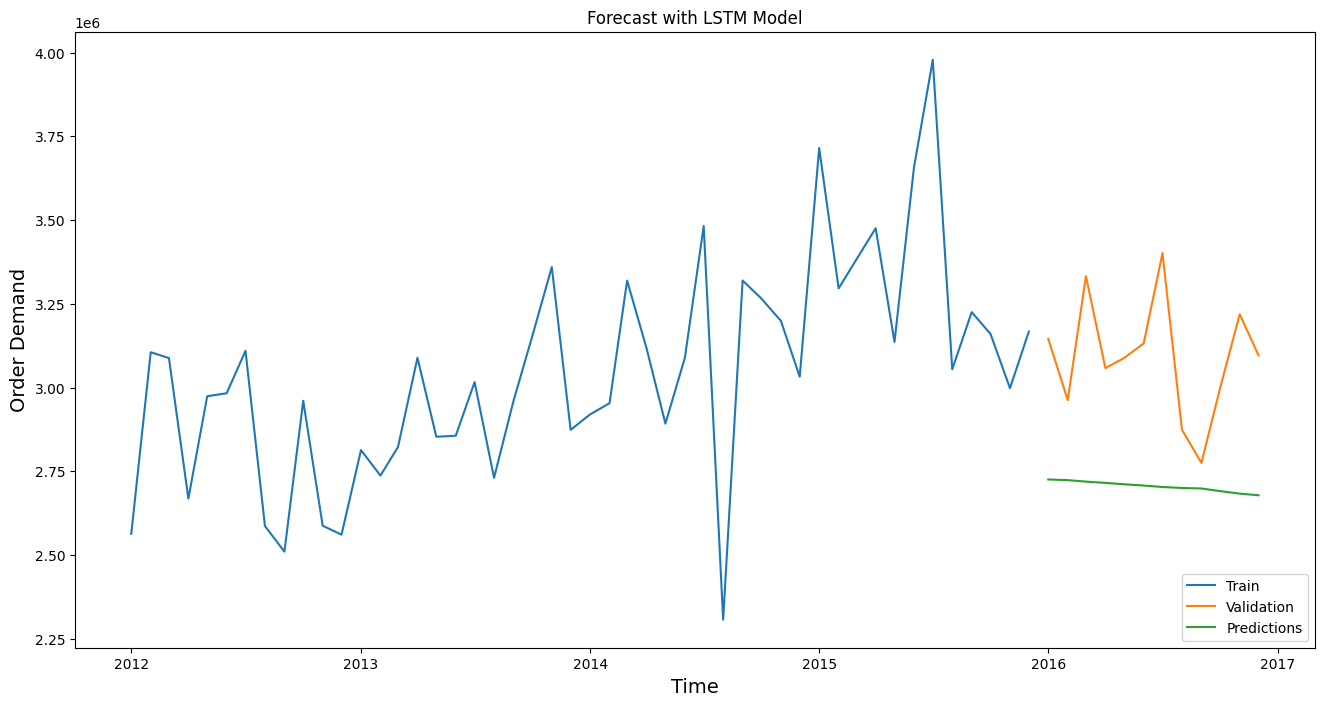

In [255]:
# plot the data
train = df3[:train_close_len]
valid = df3[train_close_len:]
valid["Predictions"] = predictions
#visualize the data
plt.figure(figsize=(16, 8))
plt.title("Forecast with LSTM Model")
plt.xlabel("Time", fontsize=14)
plt.ylabel("Order Demand", fontsize=14)
plt.plot(df2["Date"][:train_close_len], train["OrderDemand"])
plt.plot(df2["Date"][train_close_len:], valid[["OrderDemand", "Predictions"]])
plt.legend(["Train", "Validation", "Predictions"], loc="lower right")
plt.show()

In [ ]:
# change the parameters of first LSTM model and build the Optimized LSTM Model
optimized_model = Sequential()

optimized_model.add(LSTM(512, activation='relu', return_sequences=True, input_shape=(X_train.shape[1], 1)))

optimized_model.add(LSTM(256, activation='relu', return_sequences=False))

optimized_model.add(Dense(128))

optimized_model.add(Dense(64))

optimized_model.add(Dense(32))

optimized_model.add(Dense(1))

In [ ]:
tf.keras.backend.set_epsilon(1)

# compile the model
optimized_model.compile(optimizer="Adam", loss="mean_squared_error", metrics=['mape'])

In [ ]:
# train the optimized model
optimized_model.fit(X_train, y_train, 
          batch_size=32, 
          epochs=20, 
          verbose=1)

Epoch 1/20
41/41 [==============================] - 47s 1s/step - loss: 0.0476 - mape: 17.7921
Epoch 2/20
41/41 [==============================] - 47s 1s/step - loss: 0.0410 - mape: 16.2953
Epoch 3/20
41/41 [==============================] - 47s 1s/step - loss: 0.0414 - mape: 16.5840
Epoch 4/20
41/41 [==============================] - 47s 1s/step - loss: 0.0417 - mape: 16.6688
Epoch 5/20
41/41 [==============================] - 48s 1s/step - loss: 0.0410 - mape: 16.4297
Epoch 6/20
41/41 [==============================] - 47s 1s/step - loss: 0.0405 - mape: 16.2138
Epoch 7/20
41/41 [==============================] - 48s 1s/step - loss: 0.0414 - mape: 16.5387
Epoch 8/20
41/41 [==============================] - 48s 1s/step - loss: 0.0396 - mape: 16.0280
Epoch 9/20
41/41 [==============================] - 48s 1s/step - loss: 0.0387 - mape: 15.8832
Epoch 10/20
41/41 [==============================] - 50s 1s/step - loss: 0.0385 - mape: 15.7535
Epoch 11/20
41/41 [==============================

In [ ]:
# Predict with optimized LSTM model
o_predictions = optimized_model.predict(X_test)
o_predictions = scaler.inverse_transform(o_predictions)

11/11 [==============================] - 3s 252ms/step


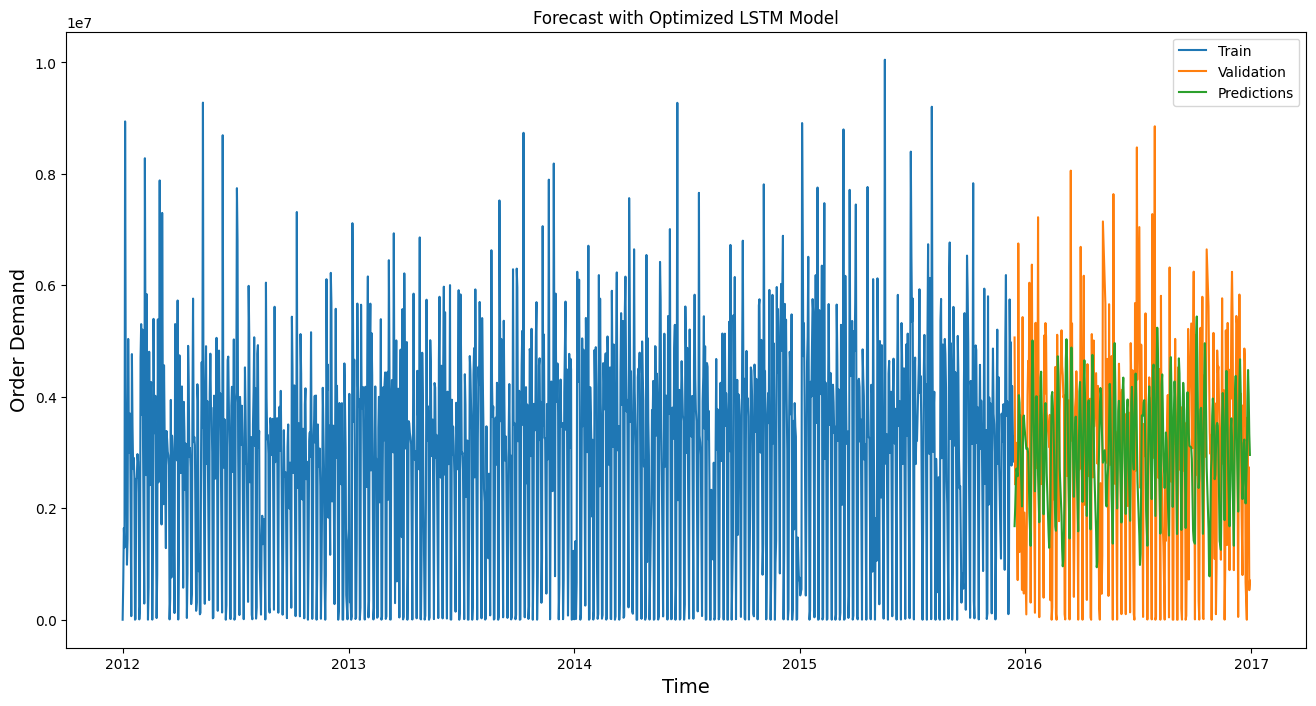

In [ ]:
# plot the data
train = orderD[:train_close_len]
valid = orderD[train_close_len:]
valid["Predictions"] = o_predictions
#visualize the data
plt.figure(figsize=(16, 8))
plt.title("Forecast with Optimized LSTM Model")
plt.xlabel("Time", fontsize=14)
plt.ylabel("Order Demand", fontsize=14)
plt.plot(df["Date"][:train_close_len], train["OrderDemand"])
plt.plot(df["Date"][train_close_len:], valid[["OrderDemand", "Predictions"]])
plt.legend(["Train", "Validation", "Predictions"], loc="upper right")
plt.show()

In [39]:
from matplotlib.pyplot import figure
figure(figsize=(12, 5), dpi=80, linewidth=10)
plt.plot(df['Demand'], linestyle = '-')
plt.plot(df['Forecast'], linestyle = '--')
plt.title('Prediction Result')
plt.ylabel('Number of Demand', fontsize=1)
plt.show() 

AttributeError: 'numpy.ndarray' object has no attribute 'plot_diagnostics'